In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 1. Frequency tagging
## 1.1 Testing cueing effect on normalized amplitude

In [28]:

df_participant

,value,participant,tag,attention
0,0.942102,B2,60,0
1,1.015734,B2,60,0
2,1.110477,B2,60,1
3,0.931687,B2,60,1
4,0.958606,B2,64,0
5,1.047506,B2,64,0
6,1.012163,B2,64,1
7,0.981725,B2,64,1


In [32]:
participants = ['B1', 'B2','B3'] 
column_names = [
    '60cued_tag_60_attention_0',
    '60cued_tag_64_attention_0',
    '60cued_tag_60_attention_1',
    '60cued_tag_64_attention_1',
    '64cued_tag_60_attention_0',
    '64cued_tag_64_attention_0',
    '64cued_tag_60_attention_1',
    '64cued_tag_64_attention_1',
]

npsds = []
for participant in participants:
    df_participant = np.load(f'files/{participant}_normalizes_psds.npy').flatten()
    df_participant = pd.DataFrame([df_participant], columns=column_names).melt()
    df_participant['participant'] = participant
    df_participant[['tag', '__', 'attention', '_','attention']] = df_participant['variable'].str.split('_', expand=True)
    df_participant['tag'] = df_participant['tag'].str[:2]
    df_participant = df_participant.drop(columns=['variable','_','__'])
    npsds.append(df_participant)
npsds = pd.concat(npsds)
# npsds.columns = ['cued','uncued']
# npsds['participant'] = participants
# npsds = npsds.melt(id_vars='participant')
# npsds.columns = ['participant', 'Cueing','Normalized amplitude']
npsds['cue_bin'] = 
# npsds['Cueing'] = npsds['Cueing'].replace({'cued': 'Cued', 'uncued': 'Uncued'})

npsds

In [33]:
sns.catplot(y='Normalized amplitude', x='Cueing', hue='participant', col='attention', data=npsds, kind='point')

ValueError: Could not interpret input 'Cueing'

For an attentional effect, we expect the left plot to decrease and the right one to increase. Standard deviation are between the electrodes. 

In [5]:
npsds.columns = ['participant', 'Cueing','value','cue_bin']
npsds

,participant,Cueing,value,cue_bin
0,B1,Cued,1.074194,1
1,B2,Cued,1.043009,1
2,B3,Cued,1.028049,1
3,B1,Uncued,0.925806,0
4,B2,Uncued,0.956991,0
5,B3,Uncued,0.971951,0


In [7]:
md = smf.mixedlm("value ~ cue_bin", npsds, groups=npsds["participant"])
mdf = md.fit()
print(mdf.summary())

       Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: value 
No. Observations: 6       Method:             REML  
No. Groups:       3       Scale:              0.0006
Min. group size:  2       Log-Likelihood:     8.1970
Max. group size:  2       Converged:          No    
Mean group size:  2.0                               
----------------------------------------------------
           Coef. Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------
Intercept  0.952    0.014 69.580 0.000  0.925  0.978
cue_bin    0.097    0.019  5.038 0.000  0.059  0.135
Group Var  0.000                                    



/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maxim

## 1.2 IT coherence

In [22]:
participants = ['B1', 'B2', 'B3'] 
ITcoh = []
for participant in participants:
    df_participant = pd.read_csv(f'files/ITcoh_{participant}.csv', index_col=False)
    df_participant['participant'] = participant
    ITcoh.append(df_participant)
ITcoh = pd.concat(ITcoh)
ITcoh['cued_group'] = (ITcoh['coh_with'] == ITcoh['cued'])
#Average over electrodes
ITcoh = ITcoh.groupby(['participant','cued_group','coh_with','condition','time']).ITcoherence.mean().reset_index()
ITcoh

,participant,cued_group,coh_with,condition,time,ITcoherence
0,B1,False,60,endo,-1.000000,0.116239
1,B1,False,60,endo,-0.999512,0.116005
2,B1,False,60,endo,-0.999023,0.115765
3,B1,False,60,endo,-0.998535,0.115520
4,B1,False,60,endo,-0.998047,0.115270
...,...,...,...,...,...,...
98323,B3,True,64,exo,0.998047,0.087024
98324,B3,True,64,exo,0.998535,0.086697
98325,B3,True,64,exo,0.999023,0.086400
98326,B3,True,64,exo,0.999512,0.086130


/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075

<Axes: xlabel='time', ylabel='ITcoherence'>

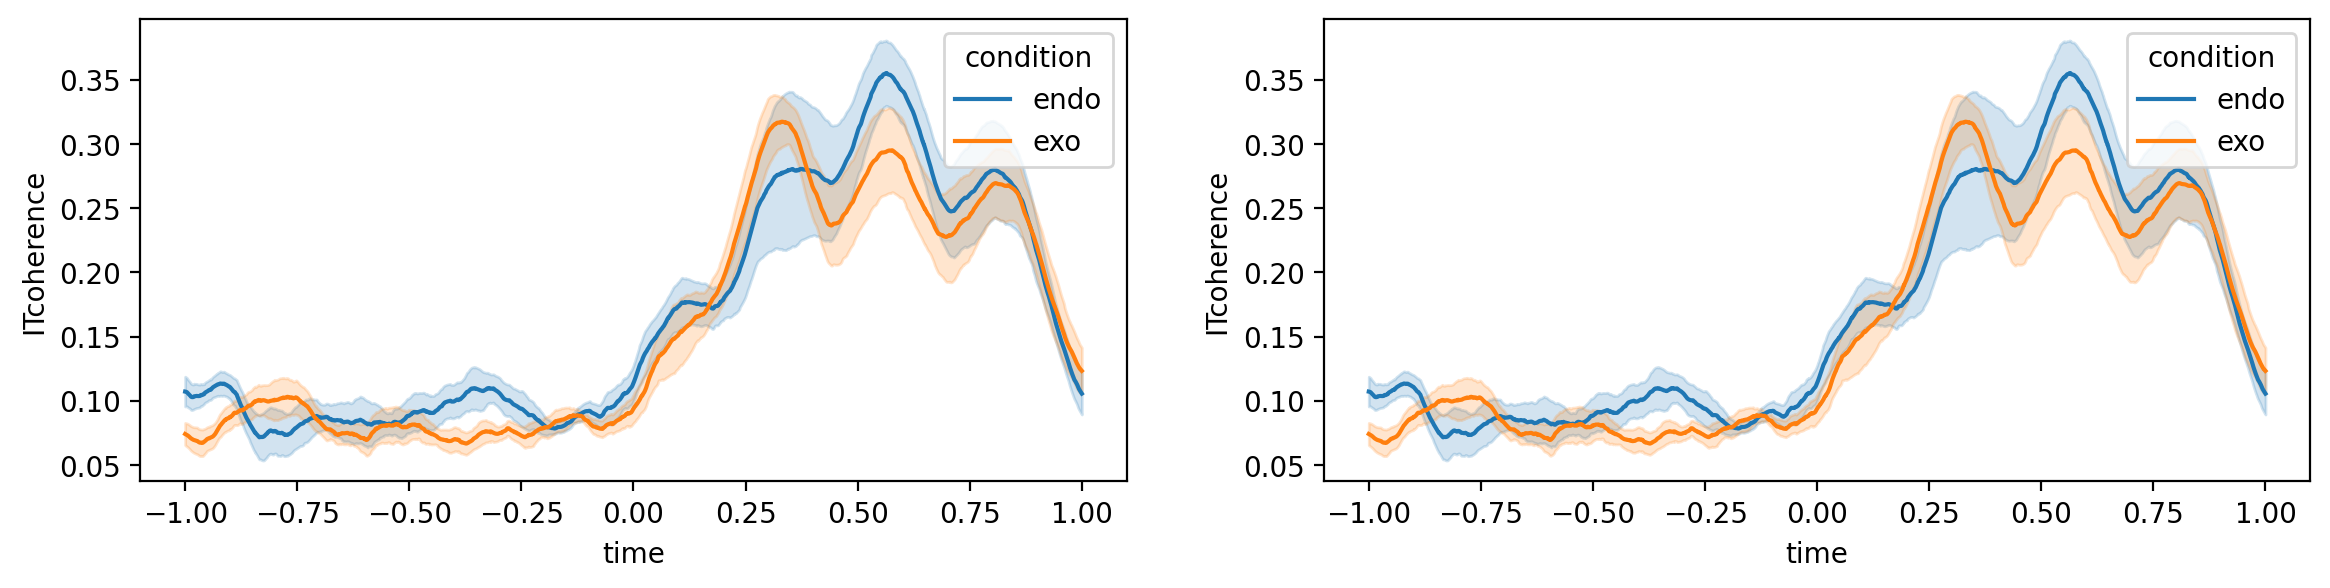

In [23]:
fig, ax = plt.subplots(1,2, figsize=(14,3),dpi=200)
sns.lineplot(y='ITcoherence', hue='condition', x='time', data=ITcoh[ITcoh.cued_group == True], errorbar='se', ax=ax[0])
sns.lineplot(y='ITcoherence', hue='condition', x='time', data=ITcoh[ITcoh.cued_group == True], errorbar='se', ax=ax[1])

In [8]:
ITcoh_stim_onset = ITcoh[ITcoh.time == 1]
ITcoh_stim_onset['cued'] = (ITcoh_stim_onset['coh_with'] == ITcoh_stim_onset['cued']).astype(int)
ITcoh_stim_onset.loc[ITcoh_stim_onset['coh_with'] == 56, 'coh_with'] = 0
ITcoh_stim_onset.loc[ITcoh_stim_onset['coh_with'] == 60, 'coh_with'] = 1
print(ITcoh_stim_onset)

      participant  cued  coh_with  time  ITcoherence
4096           A0     1         0   1.0     0.190600
8193           A0     0         1   1.0     0.159049
12290          A0     0         0   1.0     0.156663
16387          A0     1         1   1.0     0.243192
20484          A1     1         0   1.0     0.179212
24581          A1     0         1   1.0     0.066898
28678          A1     0         0   1.0     0.165625
32775          A1     1         1   1.0     0.183095
36872          A2     1         0   1.0     0.310464
40969          A2     0         1   1.0     0.163799
45066          A2     0         0   1.0     0.210226
49163          A2     1         1   1.0     0.216907


/tmp/ipykernel_10680/3325495074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ITcoh_stim_onset['cued'] = (ITcoh_stim_onset['coh_with'] == ITcoh_stim_onset['cued']).astype(int)


In [9]:
md = smf.mixedlm("ITcoherence ~ cued", ITcoh_stim_onset, groups=ITcoh_stim_onset["participant"])
mdf = md.fit()
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ITcoherence
No. Observations: 12      Method:             REML       
No. Groups:       3       Scale:              0.0015     
Min. group size:  4       Log-Likelihood:     15.2046    
Max. group size:  4       Converged:          Yes        
Mean group size:  4.0                                    
----------------------------------------------------------
             Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept    0.154     0.025  6.207  0.000   0.105   0.202
cued         0.067     0.022  3.005  0.003   0.023   0.110
Group Var    0.001     0.043                              



/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


# 2. Decoding

In [4]:
participants = ['B1', 'B2', 'B3'] 
target_period = []
for participant in participants:
    df_participant = pd.read_csv(f'files/{participant}_target_period.csv', index_col=False)
    df_participant['participant'] = participant
    target_period.append(df_participant)
target_period = pd.concat(target_period)

/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075

(0.4, 0.85)

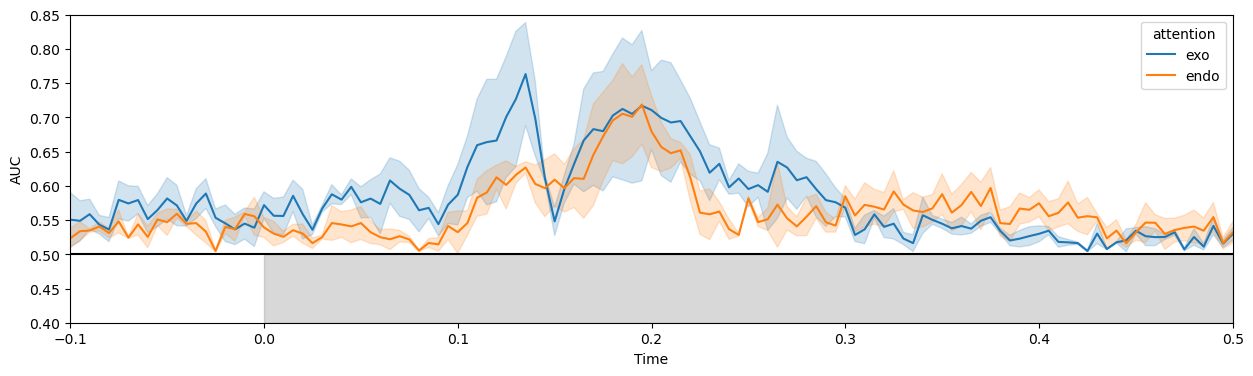

In [20]:
plt.subplots(figsize=(15,4))
sns.lineplot(y='score', hue='attention', x='time', data=target_period, errorbar='se')
plt.hlines(.5, -1, 2.3, 'k')
plt.ylabel('AUC')
plt.xlabel('Time')
plt.xlim(-.1,.5)
plt.fill_betweenx([0.4, 0.5], 0, 0.5, color='gray', alpha=0.3)
plt.ylim(.4, .85)


### Before the ERP

In [54]:
participants = ['B1', 'B2', 'B3'] 
erps = []
for participant in participants:
    df_participant = pd.read_csv(f'files/erp_{participant}.csv', index_col=False)
    df_participant['participant'] = participant
    erps.append(df_participant)
erps = pd.concat(erps)
erps['Voltage'] = erps['erp']
erps['Time'] = erps['time']

/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075

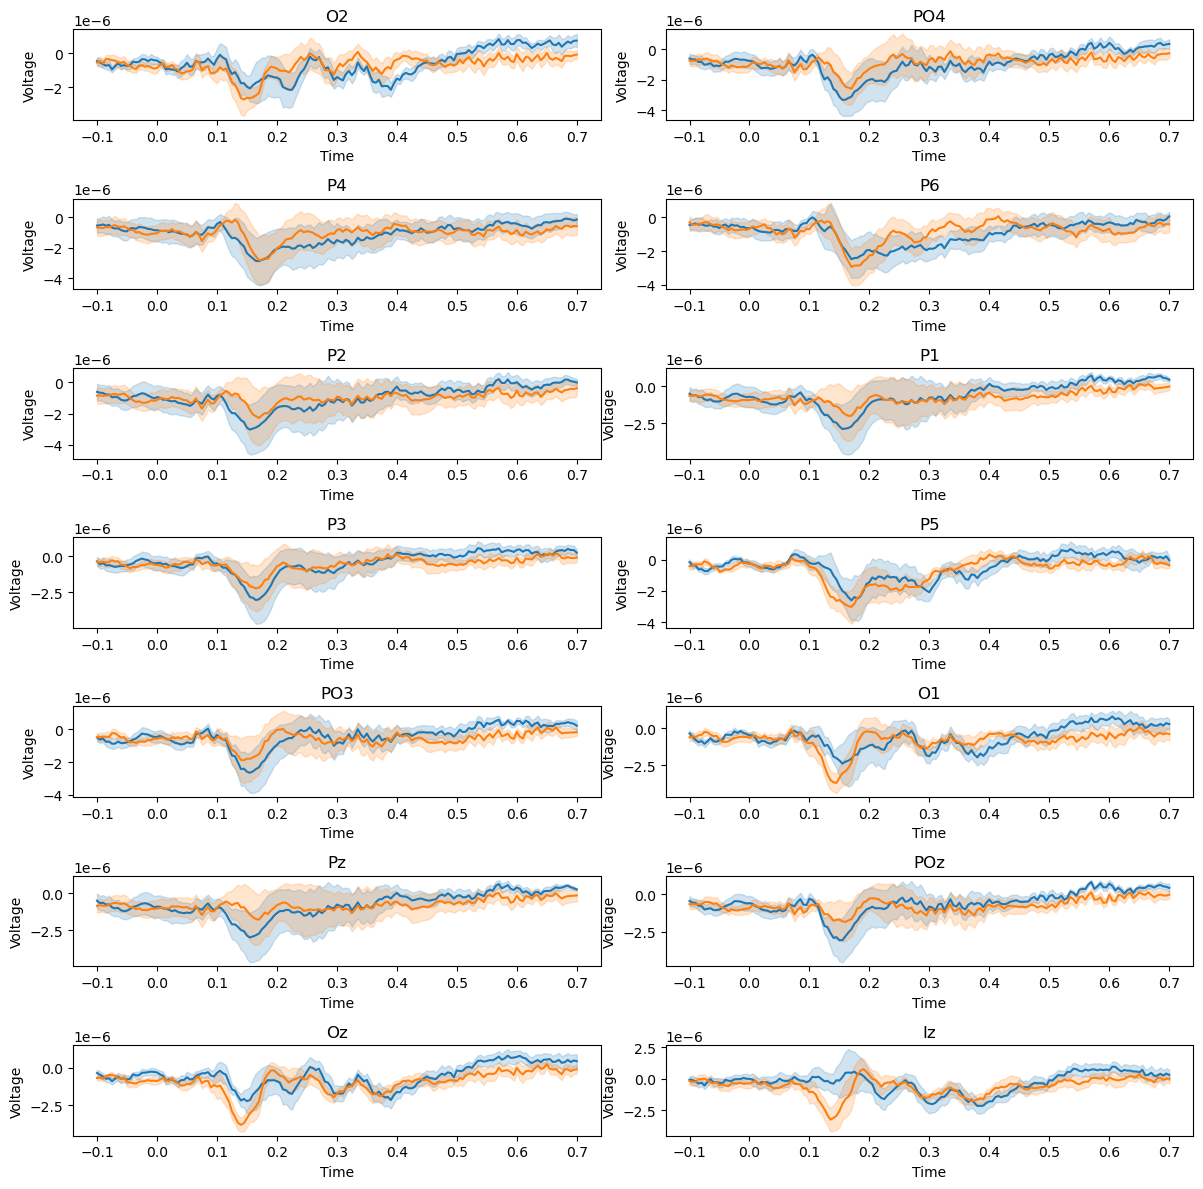

In [55]:
fig, axes = plt.subplots(int(len(erps.channel.unique())/2),2, figsize=(12,12))
axes = axes.flatten()
for ax, e in zip(axes, erps.channel.unique()):
    sns.lineplot(y='Voltage', hue='attention', x='Time', data=erps[erps.channel ==e], errorbar='se', ax=ax, legend=False)
    ax.set_title(e)
plt.tight_layout()

In [56]:
participants = ['B1', 'B2', 'B3'] 
post_erp = []
for participant in participants:
    df_participant = pd.read_csv(f'files/{participant}_post_erp.csv', index_col=False)
    df_participant['participant'] = participant
    post_erp.append(df_participant)
post_erp = pd.concat(post_erp)

/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075

(0.4, 0.85)

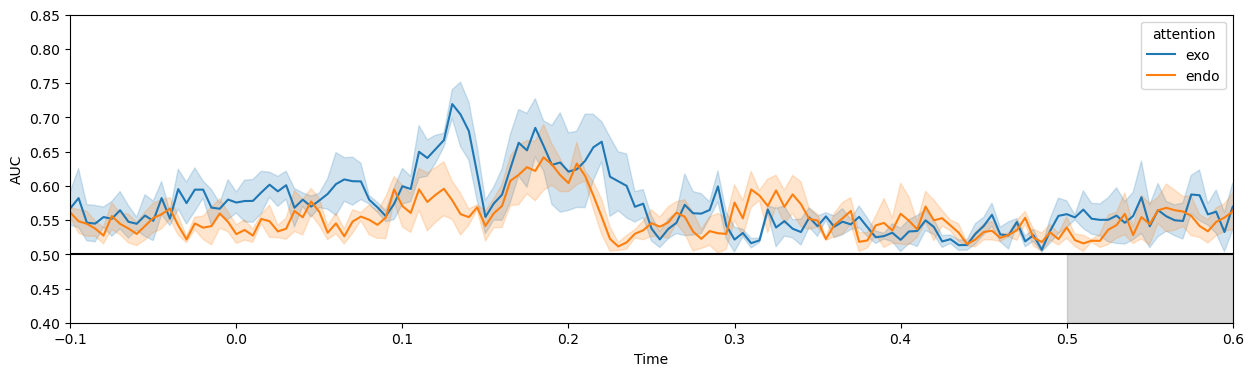

In [57]:
plt.subplots(figsize=(15,4))
sns.lineplot(y='score', hue='attention', x='time', data=post_erp, errorbar='se')
plt.hlines(.5, -1, 2.3, 'k')
plt.ylabel('AUC')
plt.xlabel('Time')
plt.xlim(-.1,.6)
plt.fill_betweenx([0.4, 0.5], 0.5, 0.6, color='gray', alpha=0.3)
plt.ylim(.4, .85)

In [13]:
participants = ['B1', 'B2', 'B3'] 
trial_end = []
for participant in participants:
    df_participant = pd.read_csv(f'files/{participant}_trial_end.csv', index_col=False)
    df_participant['participant'] = participant
    trial_end.append(df_participant)
trial_end = pd.concat(trial_end)

/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075

(0.4, 0.85)

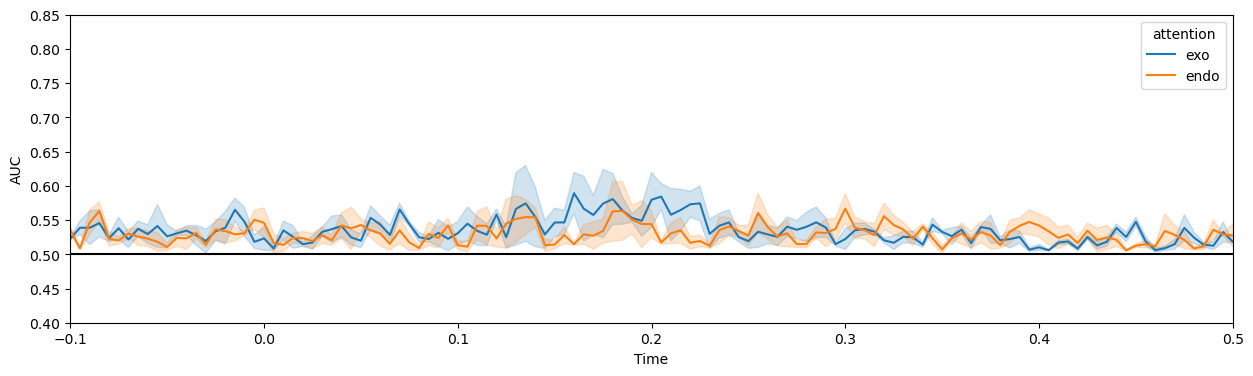

In [19]:
plt.subplots(figsize=(15,4))
sns.lineplot(y='score', hue='attention', x='time', data=trial_end, errorbar='se')
plt.hlines(.5, -1, 2.3, 'k')
plt.ylabel('AUC')
plt.xlabel('Time')
plt.xlim(-.1,.5)
plt.ylim(.4, .85)